In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm, skew 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ML/Dataset/Loan_Prediction/train_csv.csv')
test = pd.read_csv('/content/drive/MyDrive/ML/Dataset/Loan_Prediction/test.csv.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# **Data overview**

In [ ]:
train = train.drop('Loan_ID',axis = 1)

In [ ]:
train.shape

(614, 12)

**Data summary**

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

In [ ]:
train.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


We change the target from Yes, No into logical expression.

In [ ]:
target = 'Loan_Status'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train[target] = encoder.fit_transform(train[target])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
cat_cols = train.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
num_cols = train.dtypes != 'object'
num_cols = list(num_cols[num_cols].index)
num_cols.remove('Loan_Status')

In [ ]:
train[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [ ]:
train[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


# EDA

Get summary of target variable. 

In [ ]:
train[target].describe()

count    614.000000
mean       0.687296
std        0.463973
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Loan_Status, dtype: float64

# Visualization

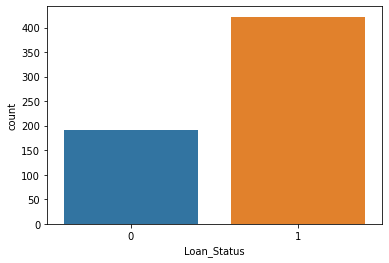

In [ ]:
sns.countplot(x=target, data=train)

**Relationship with numerical features**

In the following section, plot boxes will be made to see the relationship of target varible and numerical features.

In [ ]:
def num_boxplot(col,target,train,y = 80000):
    data =  pd.concat([train[target], train[col]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=str(target), y=col, data=train)
    fig.axis(ymin=0, ymax=y);

Applicant Income and target

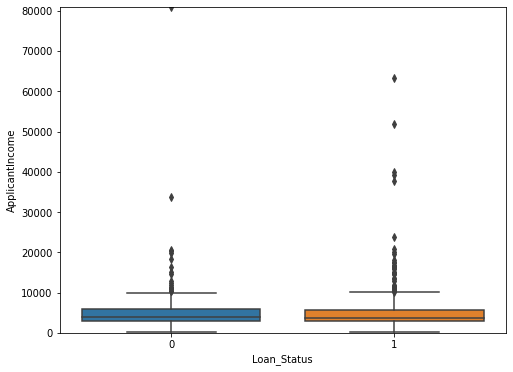

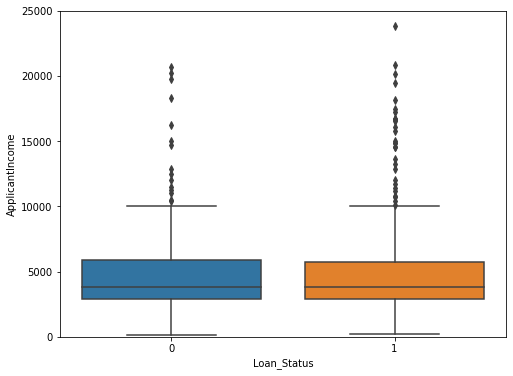

In [ ]:
#Maximum value in ApplicantIncome is 81000.
num_boxplot(num_cols[0],target,train,81000)
num_boxplot(num_cols[0],target,train,25000)

The distributions of applicant income on different loan status are similar. Hence, there're lot of outliers.

**What are average values of numerical features for each loan status?**

In [ ]:
train[train.Loan_Status == 1].mean()

ApplicantIncome      5384.068720
CoapplicantIncome    1504.516398
LoanAmount            144.294404
Loan_Amount_Term      341.072464
Credit_History          0.981818
Loan_Status             1.000000
dtype: float64

In [ ]:
train[train.Loan_Status == 0].mean()

ApplicantIncome      5446.078125
CoapplicantIncome    1877.807292
LoanAmount            151.220994
Loan_Amount_Term      344.064516
Credit_History          0.541899
Loan_Status             0.000000
dtype: float64

# Missing Data/ Data Cleaning

In [ ]:
#Join the df together handling the missing data together
all_df = pd.concat([train,test.drop('Loan_ID',axis =1)],axis = 0)
#train = all_df.iloc[1:614]

In [ ]:
test_id = test['Loan_ID']

In [ ]:
y = train[target]

In [ ]:
#Drop the target column, it hasn't dropped in test data set. 
all_df = all_df.drop('Loan_Status',axis = 1)
all_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
all_cols = list(all_df.columns)
missing_cols = [col for col in all_cols if all_df[col].isnull().any()]
len(missing_cols)

7

There 7 columns with missing values, let's go further.

In [ ]:
#Function to create a data frame with number and percentage of missing data in a data frame
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [ ]:
missing_df = missing_to_df(all_df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Credit_History,79,8.053007
Self_Employed,55,5.606524
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810


Missing in credit history might mean the credit history of the clients are not available. Fill the missing data with 2 means the data aren't available.

In [ ]:
all_df['Credit_History'] = all_df['Credit_History'].fillna(2)

Missing in self employed can mean a person is not in labor force or retired. So, we give a new categorical to those people.

In [ ]:
all_df['Self_Employed'] = all_df['Self_Employed'].fillna('Other')

:There are outliers in Loan Amount (maximum value is 700 ), so the missing value in this column will be filled with median. The remaining columns with missing values will be filled by median value as well. There size are relatively small, it's safe to do so.

In [ ]:
from sklearn.impute import SimpleImputer

num_missing = ['LoanAmount',  'Loan_Amount_Term']
cat_missing = ['Gender', 'Married','Dependents']

In [ ]:
median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    all_df[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(all_df[col])))

In [ ]:
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    all_df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(all_df[col])))

In [ ]:
missing_df = missing_to_df(all_df)
missing_df[missing_df['Total'] > 0]

,Total,Percent


There are no more missing data in our data set.

**Skewed features**

In [ ]:
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
ApplicantIncome,7.076120
CoapplicantIncome,6.833639
LoanAmount,2.814127
Credit_History,-0.206065
Loan_Amount_Term,-2.360768


**Box Cox Transformation of (highly) skewed features**

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_df[feat] = boxcox1p(all_df[feat], lam)

There are 5 skewed numerical features to Box Cox transform


Getting dummy categorical features

In [ ]:
all_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,17.822958,0.000000,7.120636,9.459637,0.730463,Urban
1,Male,Yes,1,Graduate,No,16.943303,13.318700,7.152988,9.459637,0.730463,Rural
2,Male,Yes,0,Graduate,Yes,15.489705,0.000000,5.859551,9.459637,0.730463,Urban
3,Male,Yes,0,Not Graduate,No,14.998030,14.703993,7.020909,9.459637,0.730463,Urban
4,Male,No,0,Graduate,No,17.916752,0.000000,7.353462,9.459637,0.730463,Urban


**Feature engineering**

In [ ]:
#Adding total income by combining applicant's income and coapplicant's income
all_df['Total_Income'] = all_df['ApplicantIncome'] + all_df['CoapplicantIncome']

Label Encoding dependets that contain information in their ordering set.

Convert 3+ in depedents into 3, and convert the column into numeric feature.

In [ ]:
all_df = all_df.replace({'Dependents': r'3+'}, {'Dependents': 3}, regex=True)

In [ ]:
# process column, apply LabelEncoder to categorical features
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(all_df["Dependents"].values))
all_df["Dependents"] = lbl.transform(list(all_df["Dependents"].values))
# shape        
print('Shape all_data: {}'.format(all_df.shape))

Shape all_data: (981, 12)


In [ ]:
s = (all_df.dtypes == 'object')
object_cols = list(s[s].index)

In [ ]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    all_df[col] = label_encoder.fit_transform(all_df[col])

In [ ]:
#all_df = pd.get_dummies(all_df)
print(all_df.shape)

(981, 12)


Getting the new train and test sets

In [ ]:
train = all_df.iloc[:614]
print(train.shape)
train.tail()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
609,0,0,0,0,0,15.377359,0.00000,5.995517,9.459637,0.730463,0,15.377359
610,1,1,3,0,0,16.557356,0.00000,4.969939,7.873203,0.730463,0,16.557356
611,1,1,1,0,0,19.035160,8.51122,8.631303,9.459637,0.730463,2,27.546379
612,1,1,2,0,0,18.795391,0.00000,7.956197,9.459637,0.730463,2,18.795391
613,0,0,0,0,2,16.943303,0.00000,7.232042,9.459637,0.000000,1,16.943303


In [ ]:
test = all_df[614:]
print(test.shape)
test.tail()

(367, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
362,1,1,0,1,2,16.474241,13.816566,7.184917,9.459637,0.730463,2,30.290808
363,1,1,0,0,0,16.601227,11.181659,6.553880,9.025890,0.730463,2,27.782887
364,1,0,0,0,0,15.757240,14.171884,7.353462,9.459637,1.194318,1,29.929125
365,1,0,0,0,0,17.253669,14.751257,7.232042,9.459637,0.730463,0,32.004926
366,1,0,0,0,2,19.544358,0.000000,6.574447,10.169007,0.730463,0,19.544358


# Modelling

Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Train test split for model building.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train,y,random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((460, 12), (154, 12), (460,), (154,))

**Logistic Regression**

In [ ]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
acc_log = round(accuracy_score(y_test,y_pred)*100,2)
acc_log


79.22

**Support Vector Machine(SVM)**

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc  = round(accuracy_score(y_test,y_pred)*100,2)
acc_svc


68.18

**Decission Tree**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(accuracy_score(y_test,y_pred)*100,2)

In [ ]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Support Vector Machines',  
              'Decision Tree'],
    'Score': [acc_log, acc_svc,
             acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,79.22
2,Decision Tree,72.08
1,Support Vector Machines,68.18


# Cross valudation


The following section is using cross validation strategy to compare performance of differnence models. 

In [ ]:
#Feature Selection
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
sel_train, valid, _ = get_data_splits(pd.concat([train,y],axis=1))
feature_cols = sel_train.columns.drop(target)

# Keep 5 features
selector = SelectKBest(f_classif, k=8)

X_new = selector.fit_transform(sel_train[feature_cols], sel_train[target])
X_new

array([[ 1.        ,  0.        ,  0.        , ...,  9.45963654,
         0.73046315, 17.82295754],
       [ 1.        ,  1.        ,  0.        , ...,  9.45963654,
         0.73046315, 30.26200346],
       [ 1.        ,  1.        ,  0.        , ...,  9.45963654,
         0.73046315, 15.48970493],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  9.45963654,
         0.73046315, 14.80720402],
       [ 1.        ,  0.        ,  1.        , ...,  9.45963654,
         1.19431764, 30.38522208],
       [ 1.        ,  1.        ,  1.        , ...,  9.45963654,
         1.19431764, 29.96135177]])

In [ ]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=sel_train.index, 
                                 columns=feature_cols)
selected_features.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.120636,9.459637,0.730463,0.0,17.822958
1,1.0,1.0,0.0,0.0,0.0,0.0,13.318700,7.152988,9.459637,0.730463,0.0,30.262003
2,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,5.859551,9.459637,0.730463,0.0,15.489705
3,1.0,1.0,0.0,1.0,0.0,0.0,14.703993,7.020909,9.459637,0.730463,0.0,29.702023
4,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.353462,9.459637,0.730463,0.0,17.916752


In [ ]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
valid[selected_columns].head()

,Gender,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
492,1,0,1,0.000000,6.844946,9.459637,0.730463,16.189216
493,0,0,1,0.000000,8.365619,9.459637,0.730463,22.139134
494,1,1,0,14.420414,7.003881,9.459637,0.000000,30.521382
495,0,1,0,11.870812,6.751853,6.314735,0.730463,27.705915
496,1,1,1,13.680989,6.789529,9.459637,0.730463,28.700340


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train[selected_columns].values)
    rmse= (cross_val_score(model, train[selected_columns].values, 
                                   y.values, scoring="f1", cv = kf))
    return(rmse)

Below show how the models above perform on the data by evaluating the cross-validation rmsle error.

**Logistic Regression**

In [ ]:
log_reg_score = rmsle_cv(logreg)
print("\nLogistic Regression score: {:.4f} ({:.4f})\n".format(log_reg_score.mean(), log_reg_score.std()))


Logistic Regression score: 0.8767 (0.0161)



**Support Vector Machine(SVM)**

In [ ]:
svc_score = rmsle_cv(svc)
print("\nSupport Vector Machines score: {:.4f} ({:.4f})\n".format(svc_score.mean(), svc_score.std()))


Support Vector Machines score: 0.8147 (0.0026)



**Decission Tree(DT)**

In [ ]:
decision_tree_score = rmsle_cv(decision_tree)
print("\nDecision_tree score: {:.4f} ({:.4f})\n".format(decision_tree_score.mean(), decision_tree_score.std()))


Decision_tree score: 0.7987 (0.0243)



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',   
              'Decision Tree'],
    'Mean_Score': [svc_score.mean() , log_reg_score.mean(), 
             decision_tree_score.mean()]})
models.sort_values(by='Mean_Score', ascending=False)

,Model,Mean_Score
1,Logistic Regression,0.876695
0,Support Vector Machines,0.814668
2,Decision Tree,0.798668
